# Basic classification: Classify images

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

2.2.0


In [2]:
import os
print(os.getcwd())

C:\Users\Venicius Ferreira\OneDrive\Quarentena\Github\Desafio 04


In [3]:
train_dir = os.path.join(os.getcwd(), 'seg_train')
test_dir = os.path.join(os.getcwd(), 'seg_test')
pred_dir = os.path.join(os.getcwd(), 'seg_pred')


## Leitura 01

In [ ]:

train_buildings_dir = os.path.join(train_dir, 'buildings')  
train_forest_dir = os.path.join(train_dir, 'forest')
train_glacier_dir = os.path.join(train_dir, 'glacier')  
train_mountain_dir = os.path.join(train_dir, 'mountain')  
train_sea_dir = os.path.join(train_dir, 'sea')  
train_street_dir = os.path.join(train_dir, 'street')  

test_buildings_dir = os.path.join(test_dir, 'buildings')  
test_forest_dir = os.path.join(test_dir, 'forest')
test_glacier_dir = os.path.join(test_dir, 'glacier')  
test_mountain_dir = os.path.join(test_dir, 'mountain')  
test_sea_dir = os.path.join(test_dir, 'sea')  
test_street_dir = os.path.join(test_dir, 'street')  

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

test_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    plotImages(sample_training_images[:5])

## Leitura 02

In [4]:
import cv2
from sklearn.utils import shuffle
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=42) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [5]:
Images, Labels = get_images(train_dir+'/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)
from random import randint


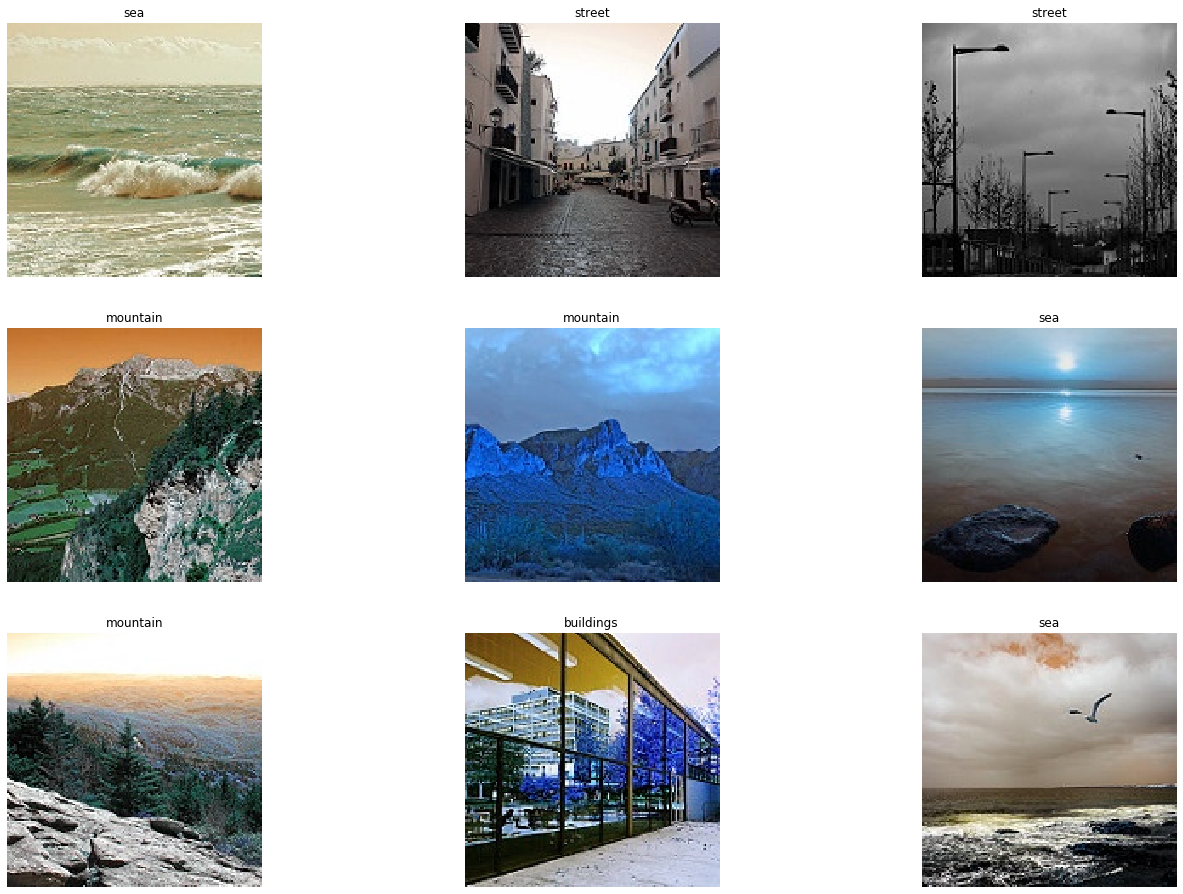

In [6]:
f,ax = plt.subplots(3,3) 
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

## Modelo 02

In [17]:
from tensorflow.keras import layers as Layers
import tensorflow.keras.optimizers as Optimizer
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, MaxPool2D, Activation

from tensorflow import keras

model = Sequential()

model.add(Conv2D(64, (3,3), strides=(1,1), input_shape=(150, 150 ,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(512, (3,3), strides=(1,1), input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(512, (3,3), strides=(1,1), input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(256, (3,3), strides=(1,1), input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(6, activation='softmax' ))


model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 512)       295424    
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 512)       2048      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 512)      

In [ ]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Epoch 1/35
 22/307 [=>............................] - ETA: 1:05:55 - loss: 2.7555 - accuracy: 0.4034

In [56]:
print(trained.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


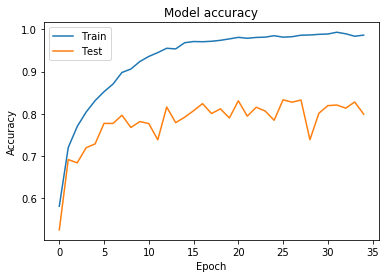

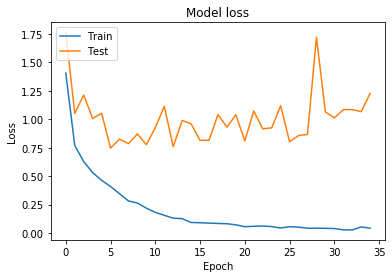

In [58]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
trained = tf.keras.models.load_model(os.getcwd())

In [15]:
test_images, test_labels = get_images(test_dir+'/') #Extract the training images from the folders.

test_images = np.array(test_images) #converting the list of images to numpy array.
test_labels = np.array(test_labels)

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

94/94 - 189s - loss: 14.7201 - accuracy: 0.1910

Test accuracy: 0.19099999964237213


In [40]:
class_names = ['Building' ,'forest','glacier','mountain','Sea' , 'Street']

In [27]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [29]:
predictions[0]

array([0.12972465, 0.12972465, 0.12973975, 0.35064203, 0.1304443 ,
       0.12972465], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [30]:
np.argmax(predictions[0])

3

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [31]:
test_labels[0]

3

Graph this to look at the full set of 10 class predictions.

In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

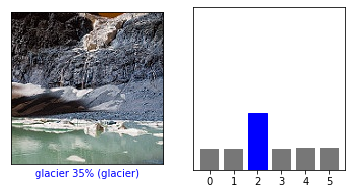

In [46]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

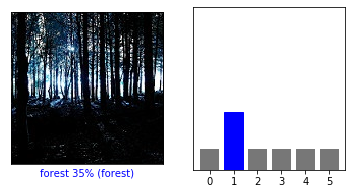

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

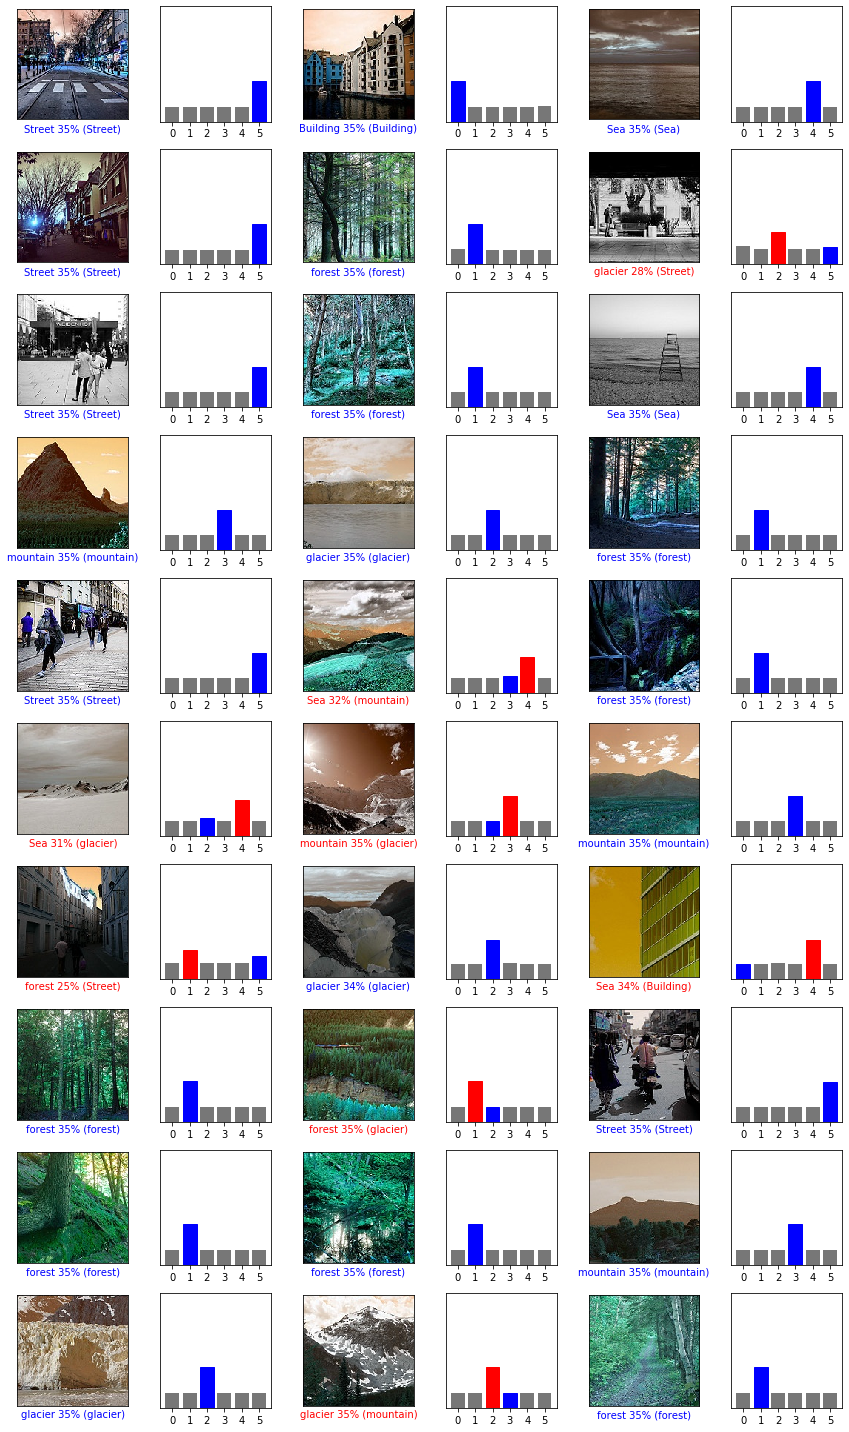

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    j = randint(0,len(test_labels))
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(j, predictions[j], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

And the model predicts a label as expected.